# Model Training

In [ ]:
# importing required data and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [ ]:
# import the csv data as dataframe 
df = pd.read_csv("data/studentsperformance.csv")
df.head()

In [ ]:
# --- PREPARING X AND Y VARIABLES---
X = df.drop(columns=['math score'], axis=1)
X.head()

In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

In [ ]:
Y = df['math score']
Y.head()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
    ]
)


In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

In [ ]:
# seperate dataset into  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("x_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
# create an evaluate function to evaluate models
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    'linear_regression': LinearRegression(),
    'lasso_regression': Lasso(),
    'Ridge_regression': Ridge(),
    'KNN_regressor': KNeighborsRegressor(),
    'Decision_tree_regressor': DecisionTreeRegressor(),
    'Random_forest_regressor': RandomForestRegressor(),
    'XGB_regressor': XGBRegressor(),
    'cat_boost_regressor': CatBoostRegressor(),
    'Ada_boost_regressor': AdaBoostRegressor()
}

model_report = [] # to store model evaluation reports
r2_list = [] # to store r2 scores of different models

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

        # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_report.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')




In [72]:
# result dataframe
result_df = pd.DataFrame({'Model':model_report, 'R2_score':r2_list})
result_df

,Model,R2_score
0,linear_regression,0.880433
1,lasso_regression,0.825320
2,Ridge_regression,0.880593
3,KNN_regressor,0.783770
4,Decision_tree_regressor,0.730540
5,Random_forest_regressor,0.852877
6,XGB_regressor,0.821221
7,cat_boost_regressor,0.851632
8,Ada_boost_regressor,0.854484


In [73]:
# linear regression 
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_pred = linear_regression.predict(X_test)
score = r2_score(y_test, linear_regression_pred)*100

print("R2 score for linear regression is: ", score)

R2 score for linear regression is:  88.04332983749565


Text(0, 0.5, 'predicted')

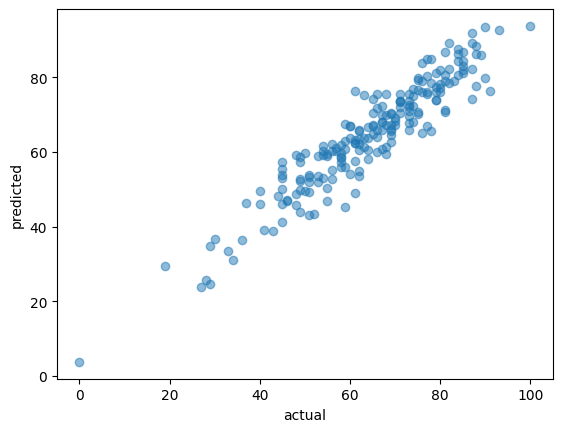

In [74]:
# plot the predictions
plt.scatter(y_test, linear_regression_pred, alpha=0.5)
plt.xlabel('actual')
plt.ylabel('predicted')

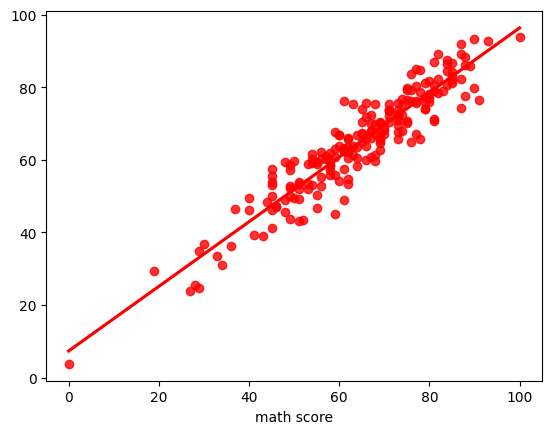

In [80]:
sns.regplot(x=y_test, y=linear_regression_pred, ci=None, color='red');